# Домашнее задание №1:
### В рамках домашнего задания доступны две опции:
* 1) Использовать готовый датасет (максимальная оценка 8);
* 2) Самостоятельно собрать посты сообщества (максимальная оценка 10).

## Данные для опции 1

#### Данные: ТОП-1000 аниме с сайта myanimelist.net
#### Состав датасета:
* title_english: Название на английском языке
* synopsis: Описание на английском языке
* year: Дата выхода
* score: Оценка пользователей
* genres: Жанры

Ссылка на файл
https://drive.google.com/file/d/1t1fgFnDo5oAx12b6upsymiWuoB1fT5tt/view?usp=sharing

## Данные для опции 2

#### Данные: Посты сообщества https://vk.com/movie за период 29.01.2024 - 29.05.2024
#### Необходимо собрать:
* Дата поста
* Текст поста
* Кол-во лайков
* Кол-во просмотров
* Кол-во репостов




Если вы безумно хотите обкачать другое сообщество, напишите Тане. (Подойдут только большие, у которых много постов).

# Требования к отправке:
* Название: TextMining2024_группа_ФамилияИмя_HW_1 Например: TextMining2024_2101_КазаковаТаня_HW_1.ipynb
* После решения задания необходимо скачать файл (Файл -> Скачать -> IPYNB)
* Затем отправить этот файл на почту tanusha.kazakova@gmail.com, тема письма должна быть аналогична названию файла (без .ipynb)

# Дедлайн - 05.06.2024 12:00
Далее работы без уважительной причины (справки) не принимаются.

Можно ли задавать вопросы по дз? Можно. Чем раньше зададите, тем лучше.

# !!!
* Перед отправкой лишний раз проверьте, что тетрадка выполняется с нуля (Среда выполнения -> Выполнить все);
* Для опции 2 потом не забудьте убрать свой API токен ВК;
* Если вы берете какой-то код или его часть из интернета - оставляйте ссылку на источник;
* Авторы работ, которые будут выглядеть подозрительно (плагиат/GPT/etc), будут защищать их на последней паре.

### Опция 1

In [1]:
# Загрузим данные в Pandas. | 1 балл
import pandas as pd

df = pd.read_csv('myAnimeList_top1000.csv', sep=';')

In [2]:
# Опишем наши данные. Есть ли какие-то аномалии или проблемные места? | 1 балл
print('Описание данных')
df.describe()

Описание данных


,year,score
count,557.000000,1000.00000
mean,2012.712747,8.16392
std,9.556726,0.28258
min,1970.000000,7.81000
25%,2008.000000,7.93000
50%,2015.000000,8.11000
75%,2020.000000,8.32000
max,2024.000000,9.37000


Состав датасета:
* title_english: Название на английском языке
* synopsis: Описание на английском языке
* year: Дата выхода
* score: Оценка пользователей
* genres: Жанры


In [3]:
print(df.head(10))

                      title_english  \
0     Frieren: Beyond Journey's End   
1  Fullmetal Alchemist: Brotherhood   
2                       Steins;Gate   
3                  Gintama Season 4   
4   Attack on Titan Season 3 Part 2   
5           Gintama: The Very Final   
6                  Gintama Season 2   
7                   Hunter x Hunter   
8                Gintama: Enchousen   
9     Legend of the Galactic Heroes   

                                            synopsis    year  score  \
0  During their decade-long quest to defeat the D...  2023.0   9.37   
1  After a horrific alchemy experiment goes wrong...  2009.0   9.09   
2  Eccentric scientist Rintarou Okabe has a never...  2011.0   9.07   
3  Gintoki, Shinpachi, and Kagura return as the f...  2015.0   9.06   
4  Seeking to restore humanity's diminishing hope...  2019.0   9.05   
5  Two years have passed following the Tendoshuu'...     NaN   9.04   
6  After a one-year hiatus, Shinpachi Shimura ret...  2011.0   9.03   
7 

In [4]:
# Заметим, что колонка genres не удобная, в препроцессинге превратим его в список

print('Пропуски в данных')
mv = df.isnull().sum()
print(mv)

Пропуски в данных
title_english    137
synopsis           3
year             443
score              0
genres            26
dtype: int64


In [5]:
# Сделаем препроцессинг текстовых данных | 2 балла
# Удалим строки, в которых есть пропуски
df = df.dropna()
mv = df.isnull().sum()
print('Пропуски')
print(mv)

df['genres'] = df['genres'].apply(lambda x: x.split(', '))

print(df.head(10))

Пропуски
title_english    0
synopsis         0
year             0
score            0
genres           0
dtype: int64
                                title_english  \
0               Frieren: Beyond Journey's End   
1            Fullmetal Alchemist: Brotherhood   
2                                 Steins;Gate   
3                            Gintama Season 4   
4             Attack on Titan Season 3 Part 2   
6                            Gintama Season 2   
7                             Hunter x Hunter   
8                          Gintama: Enchousen   
10  Kaguya-sama: Love is War - Ultra Romantic   
11            Bleach: Thousand-Year Blood War   

                                             synopsis    year  score  \
0   During their decade-long quest to defeat the D...  2023.0   9.37   
1   After a horrific alchemy experiment goes wrong...  2009.0   9.09   
2   Eccentric scientist Rintarou Okabe has a never...  2011.0   9.07   
3   Gintoki, Shinpachi, and Kagura return as the f...  

In [6]:
# Посмотрим на самые часто встречающиеся слова. Хотим ли мы добавить что-то в список стоп-слов? | 2 балла
from collections import Counter

# ссылка на источник https://stackoverflow.com/questions/29903025/count-most-frequent-100-words-from-sentences-in-dataframe-pandas
word_counts = Counter(" ".join(df["synopsis"].str.lower()).split())
commons_words = word_counts.most_common(10)
print('Самые часто встречающиеся слова:', commons_words)

# Будем считать, что слова, которые встречаются более 1000 раз можно считать стоп-словами и добавим их в список

threshold = 1000

stop_words = [word for word, count in word_counts.items() if count >= threshold]

print('Список стоп-слов:', stop_words)

Самые часто встречающиеся слова: [('the', 4584), ('to', 2615), ('of', 2118), ('and', 2012), ('a', 1940), ('his', 1190), ('in', 1087), ('is', 1004), ('by', 901), ('with', 805)]
Список стоп-слов: ['to', 'the', 'of', 'and', 'is', 'a', 'in', 'his']


In [7]:
# Какие самые часто встречающиеся слова у аниме с жанром action (у тайтла могут быть и другие жанры)? | 1 балл

action_synopsis = df[df['genres'].apply(lambda x: 'Action' in x)]['synopsis']

common_action_words = Counter(" ".join(action_synopsis.str.lower()).split()).most_common(10)

print('Самые часто встречающиеся слова у аниме с жанром action (топ 10)', common_action_words)


Самые часто встречающиеся слова у аниме с жанром action (топ 10) [('the', 1964), ('to', 926), ('of', 907), ('a', 758), ('and', 755), ('his', 497), ('in', 445), ('by', 375), ('is', 349), ('as', 310)]


In [8]:
# Визуализируйте и сравните самые часто встречающиеся слова для первых 100 тайтлов и последних 100 тайтлов по оценке пользователей | 1 балл

# Сначала отсортируем данные по оценке пользователей
df_sorted = df.sort_values(by='score', ascending=False)
top_100 = df_sorted.head(100)['synopsis']
bottom_100 = df_sorted.tail(100)['synopsis']

common_top_100 = Counter(" ".join(top_100.str.lower()).split()).most_common(10)
common_bottom_100 = Counter(" ".join(bottom_100.str.lower()).split()).most_common(10)

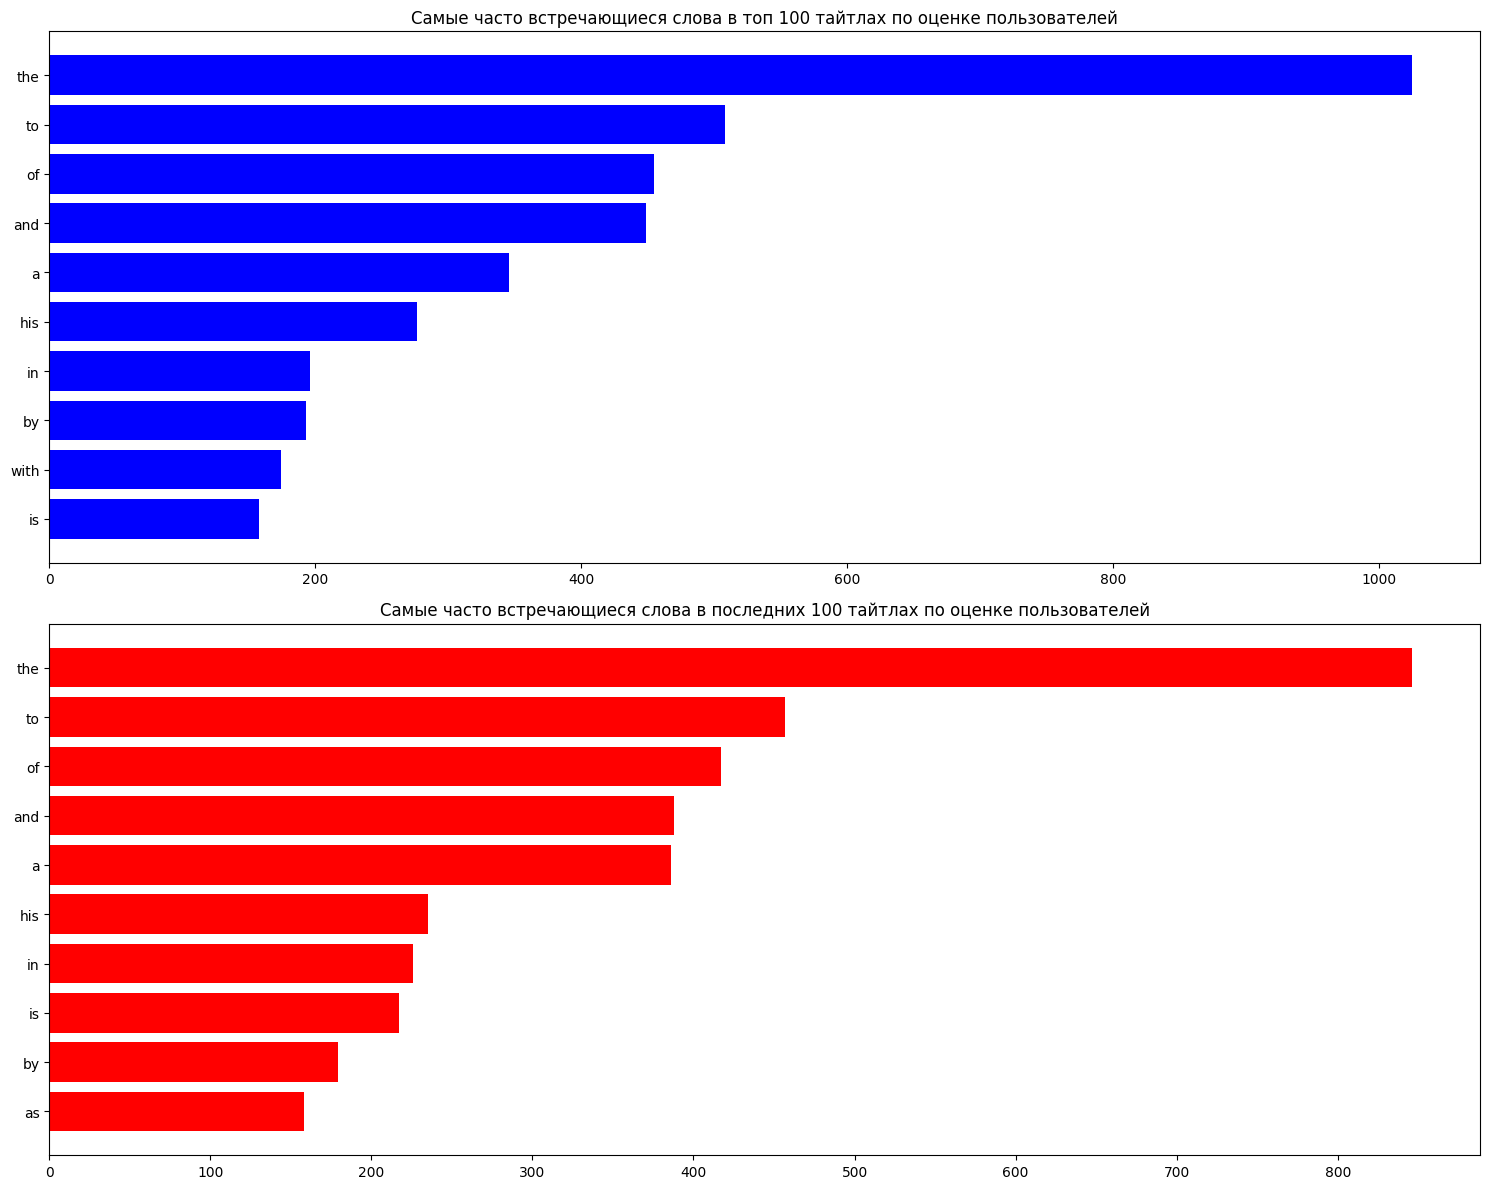

In [9]:
import matplotlib.pyplot as plt

df_top_100 = pd.DataFrame(common_top_100, columns=['Word', 'Count'])
df_bottom_100 = pd.DataFrame(common_bottom_100, columns=['Word', 'Count'])

fig, axes = plt.subplots(2, 1, figsize=(15, 12))

axes[0].barh(df_top_100['Word'], df_top_100['Count'], color='blue')
axes[0].set_title('Самые часто встречающиеся слова в топ 100 тайтлах по оценке пользователей')
axes[0].invert_yaxis()

axes[1].barh(df_bottom_100['Word'], df_bottom_100['Count'], color='red')
axes[1].set_title('Самые часто встречающиеся слова в последних 100 тайтлах по оценке пользователей')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

### Опция 2

In [10]:
# Спарсите необходимые данные. | 2 балла

In [11]:
# Загрузим данные в Pandas. | 1 балл

In [12]:
# Опишем наши данные. Есть ли какие-то аномалии или проблемные места? | 1 балл

In [13]:
# Сделаем препроцессинг текстовых данных. | 2 балла

In [14]:
# Посмотрим на самые часто встречающиеся слова. Хотим ли мы добавить что-то в список стоп-слов? | 2 балла

In [15]:
# Какие самые часто встречающиеся слова у ТОП-100 постов по кол-ву лайков? | 1 балл

In [16]:
# Визуализируйте и сравните самые часто встречающиеся слова для постов за январь-февраль и март-апрель. | 1 балл